In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 8s 0us/step


In [5]:
# zip_dir_base = os.path.dirname(zip_dir)
# !find $zip_dir_base -type d -print

In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation 
                                                            # cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation
                                                            # dog pictures

In [8]:
# Understanding our data
# Nbr of cats and dogs in our training & validation directory

In [9]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [11]:
BATCH_SIZE=100 # Number of training examples to (to feed the model) process before updating 
               # our models variables (weights & biases)

IMG_SHAPE =150 # Our training data consists of images with width of 150 pixels and height 
               # of 150 pixels

In [13]:
# Data Preparation

# Images must be formatted into appropriately pre-processed floating point tensors before 
# being fed into the network. The steps involved in preparing these images are:
# 1. Read images from the disk
# 2. Decode contents of these images and convert it into proper grid format as per their RGB
# content
# 3. Convert them into floating point tensors
# 4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural
# networks prefer to deal with small input values.'''

# Fortunately, all these tasks can be done using the class
# tf.keras.preprocessing.image.ImageDataGenerator.

In [14]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training
                                                                 # data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation
                                                                 # data

In [15]:
# Setting the way of how the training & validation image data generator should read
# the files from disk

In [16]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, # Reading 100 image @ a time
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE, # Reading 100 image @ a time
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary') # because we've just 2 classes (dog or cat)

Found 1000 images belonging to 2 classes.


In [ ]:
# Data Visualization of training images

In [18]:
sample_training_images, _ = next(train_data_gen) 

In [19]:
# This function will plot images in the form of a grid with 1 row and 5 columns where 
# images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

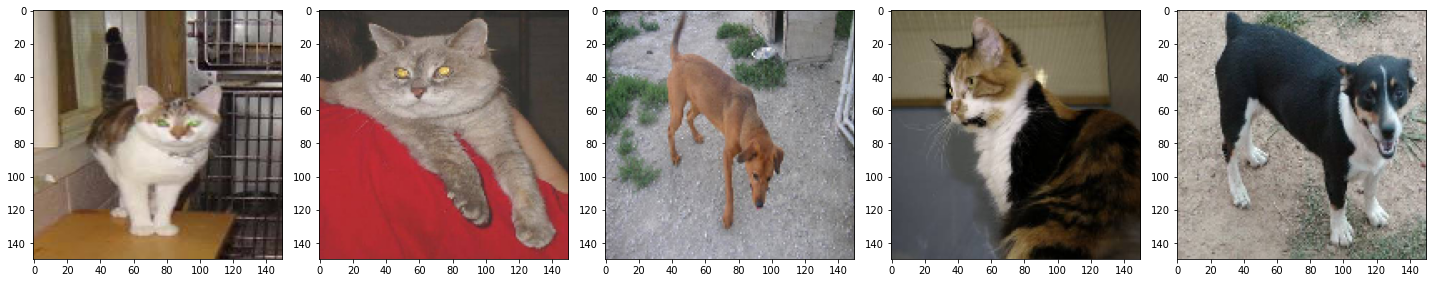

In [20]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [21]:
# Model Creation

# Define the model

# The model consists of four convolution blocks with a max pool layer in each of them.
# Then we have a fully connected layer with 512 units, with a relu activation function.
# The model will output class probabilities for two classes — dogs and cats — using softmax.

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [23]:
# Compiling the model

# As usual, we will use the adam optimizer. Since we output a softmax categorization,
# we'll use sparse_categorical_crossentropy as the loss function.
# We would also like to look at training and validation accuracy on each epoch as
# we train our network, so we are passing in the metrics argument.

In [37]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Model Summary
# Let's look at all the layers of our network using summary method.

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [39]:
# Traing the model

# Since our batches are coming from a generator (ImageDataGenerator),
# we'll use fit_generator instead of fit.

In [40]:
EPOCHS = 5
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/5
20/20 [==============================] - 384s 19s/step - loss: 0.7179 - accuracy: 0.4995 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 393s 20s/step - loss: 0.6902 - accuracy: 0.5425 - val_loss: 0.6723 - val_accuracy: 0.5560
Epoch 3/5
20/20 [==============================] - 512s 26s/step - loss: 0.6885 - accuracy: 0.5310 - val_loss: 0.6851 - val_accuracy: 0.5990
Epoch 4/5
20/20 [==============================] - 397s 20s/step - loss: 0.6678 - accuracy: 0.5960 - val_loss: 0.6603 - val_accuracy: 0.6020
Epoch 5/5
20/20 [==============================] - 411s 21s/step - loss: 0.6230 - accuracy: 0.6475 - val_loss: 0.6194 - val_accuracy: 0.6550


In [33]:
# Visualization of Trianing Results

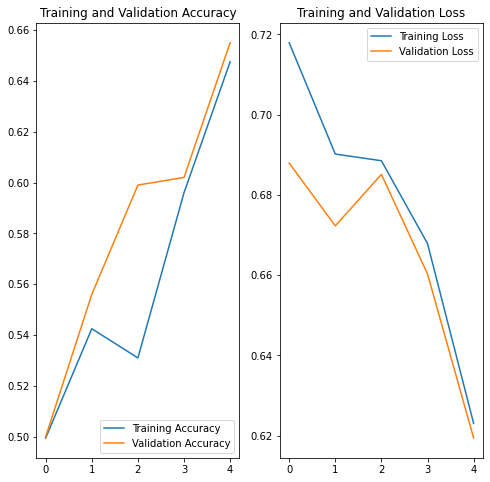

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [45]:
EPOCHS = 5
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/5
20/20 [==============================] - 384s 19s/step - loss: 0.7078 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 389s 19s/step - loss: 0.6919 - accuracy: 0.5115 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 5204s 260s/step - loss: 0.6951 - accuracy: 0.5075 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 342s 17s/step - loss: 0.6915 - accuracy: 0.5465 - val_loss: 0.6844 - val_accuracy: 0.5540
Epoch 5/5
20/20 [==============================] - 359s 18s/step - loss: 0.6797 - accuracy: 0.5705 - val_loss: 0.6694 - val_accuracy: 0.5640


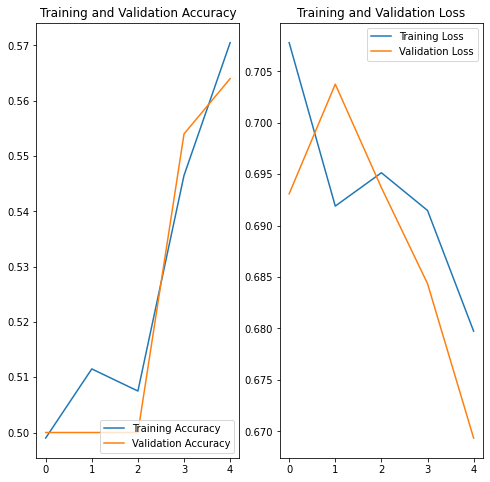

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [47]:
train_data_gen, val_data_gen = model.evaluate(validation_image_generator,steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset: ',train_data_gen)

NameError: name 'math' is not defined